<a href="https://colab.research.google.com/github/risacarvalho14/LGMVIP-DataScience/blob/main/Prediction_using_Decision_tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prediction using Decision Tree Algorithm**

## **Author - Risa Carvalho**

In [2]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## **Importing Datasets**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [4]:
iris_df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.shape

(150, 6)

In [6]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [9]:
iris_df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
iris_df.rename(columns ={'SepalLengthcm': 'sepal length cm' , 'SepalWidthCm': 'sepal width cm', 'PetalLengthCm': 'petal length cm','PetalWidthCm': 'petal width cm'},inplace = True)

In [11]:
iris_df.head()

,Id,SepalLengthCm,sepal width cm,petal length cm,petal width cm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


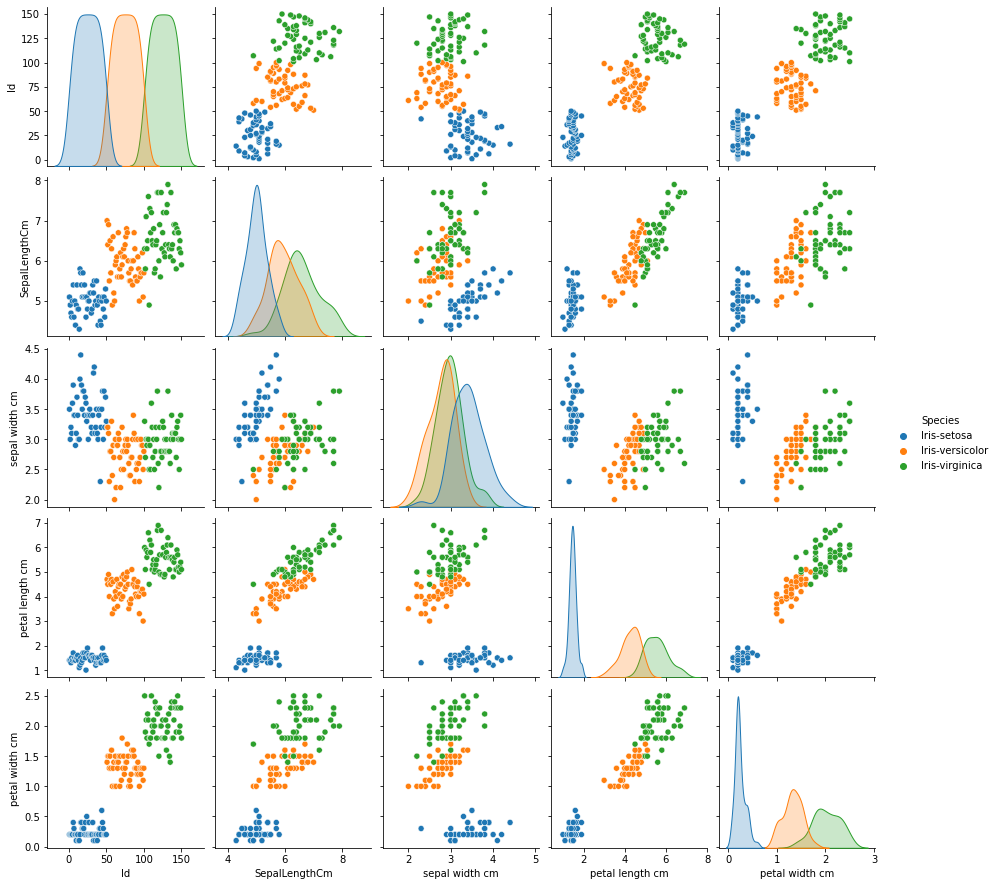

In [12]:
sns.pairplot(data = iris_df, hue = "Species")
plt.show()

From the above figure we can see that '**Iris Setosa**' make distinctive cluster while others overlap.

In [13]:
iris_df.corr()

,Id,SepalLengthCm,sepal width cm,petal length cm,petal width cm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
sepal width cm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
petal length cm,0.882747,0.871754,-0.420516,1.000000,0.962757
petal width cm,0.899759,0.817954,-0.356544,0.962757,1.000000


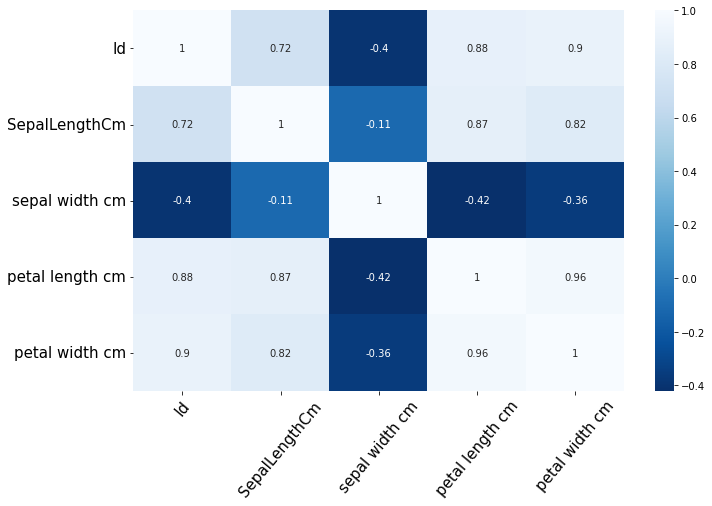

In [14]:
plt.figure(figsize=(11,7))
sns.heatmap(data = iris_df.corr(), annot = True, cmap = "Blues_r")
plt.xticks(fontsize = 15, rotation = 50)
plt.yticks(fontsize = 15,)

plt.show()

### In the above figure as we can see the **lighter shade** shows a positive correlation whereas the **darker** **shade** shows a **negative correlation**

In [15]:
X = iris_df.drop(["Species",'Id'],axis = 1)
y = iris_df["Species"]

In [16]:
X.head()

,SepalLengthCm,sepal width cm,petal length cm,petal width cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, random_state = 19)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [21]:
from sklearn.tree import DecisionTreeClassifier
decitree = DecisionTreeClassifier()

decitree.fit(X_train , y_train)
print("Decision tree algorithm successfully implemented")
y_pred = decitree.predict(X_test)


from sklearn. metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix :")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy*100)
print("classification report :")
print(classification_report(y_test, y_pred))




Decision tree algorithm successfully implemented
Confusion matrix :
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
accuracy: 100.0
classification report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



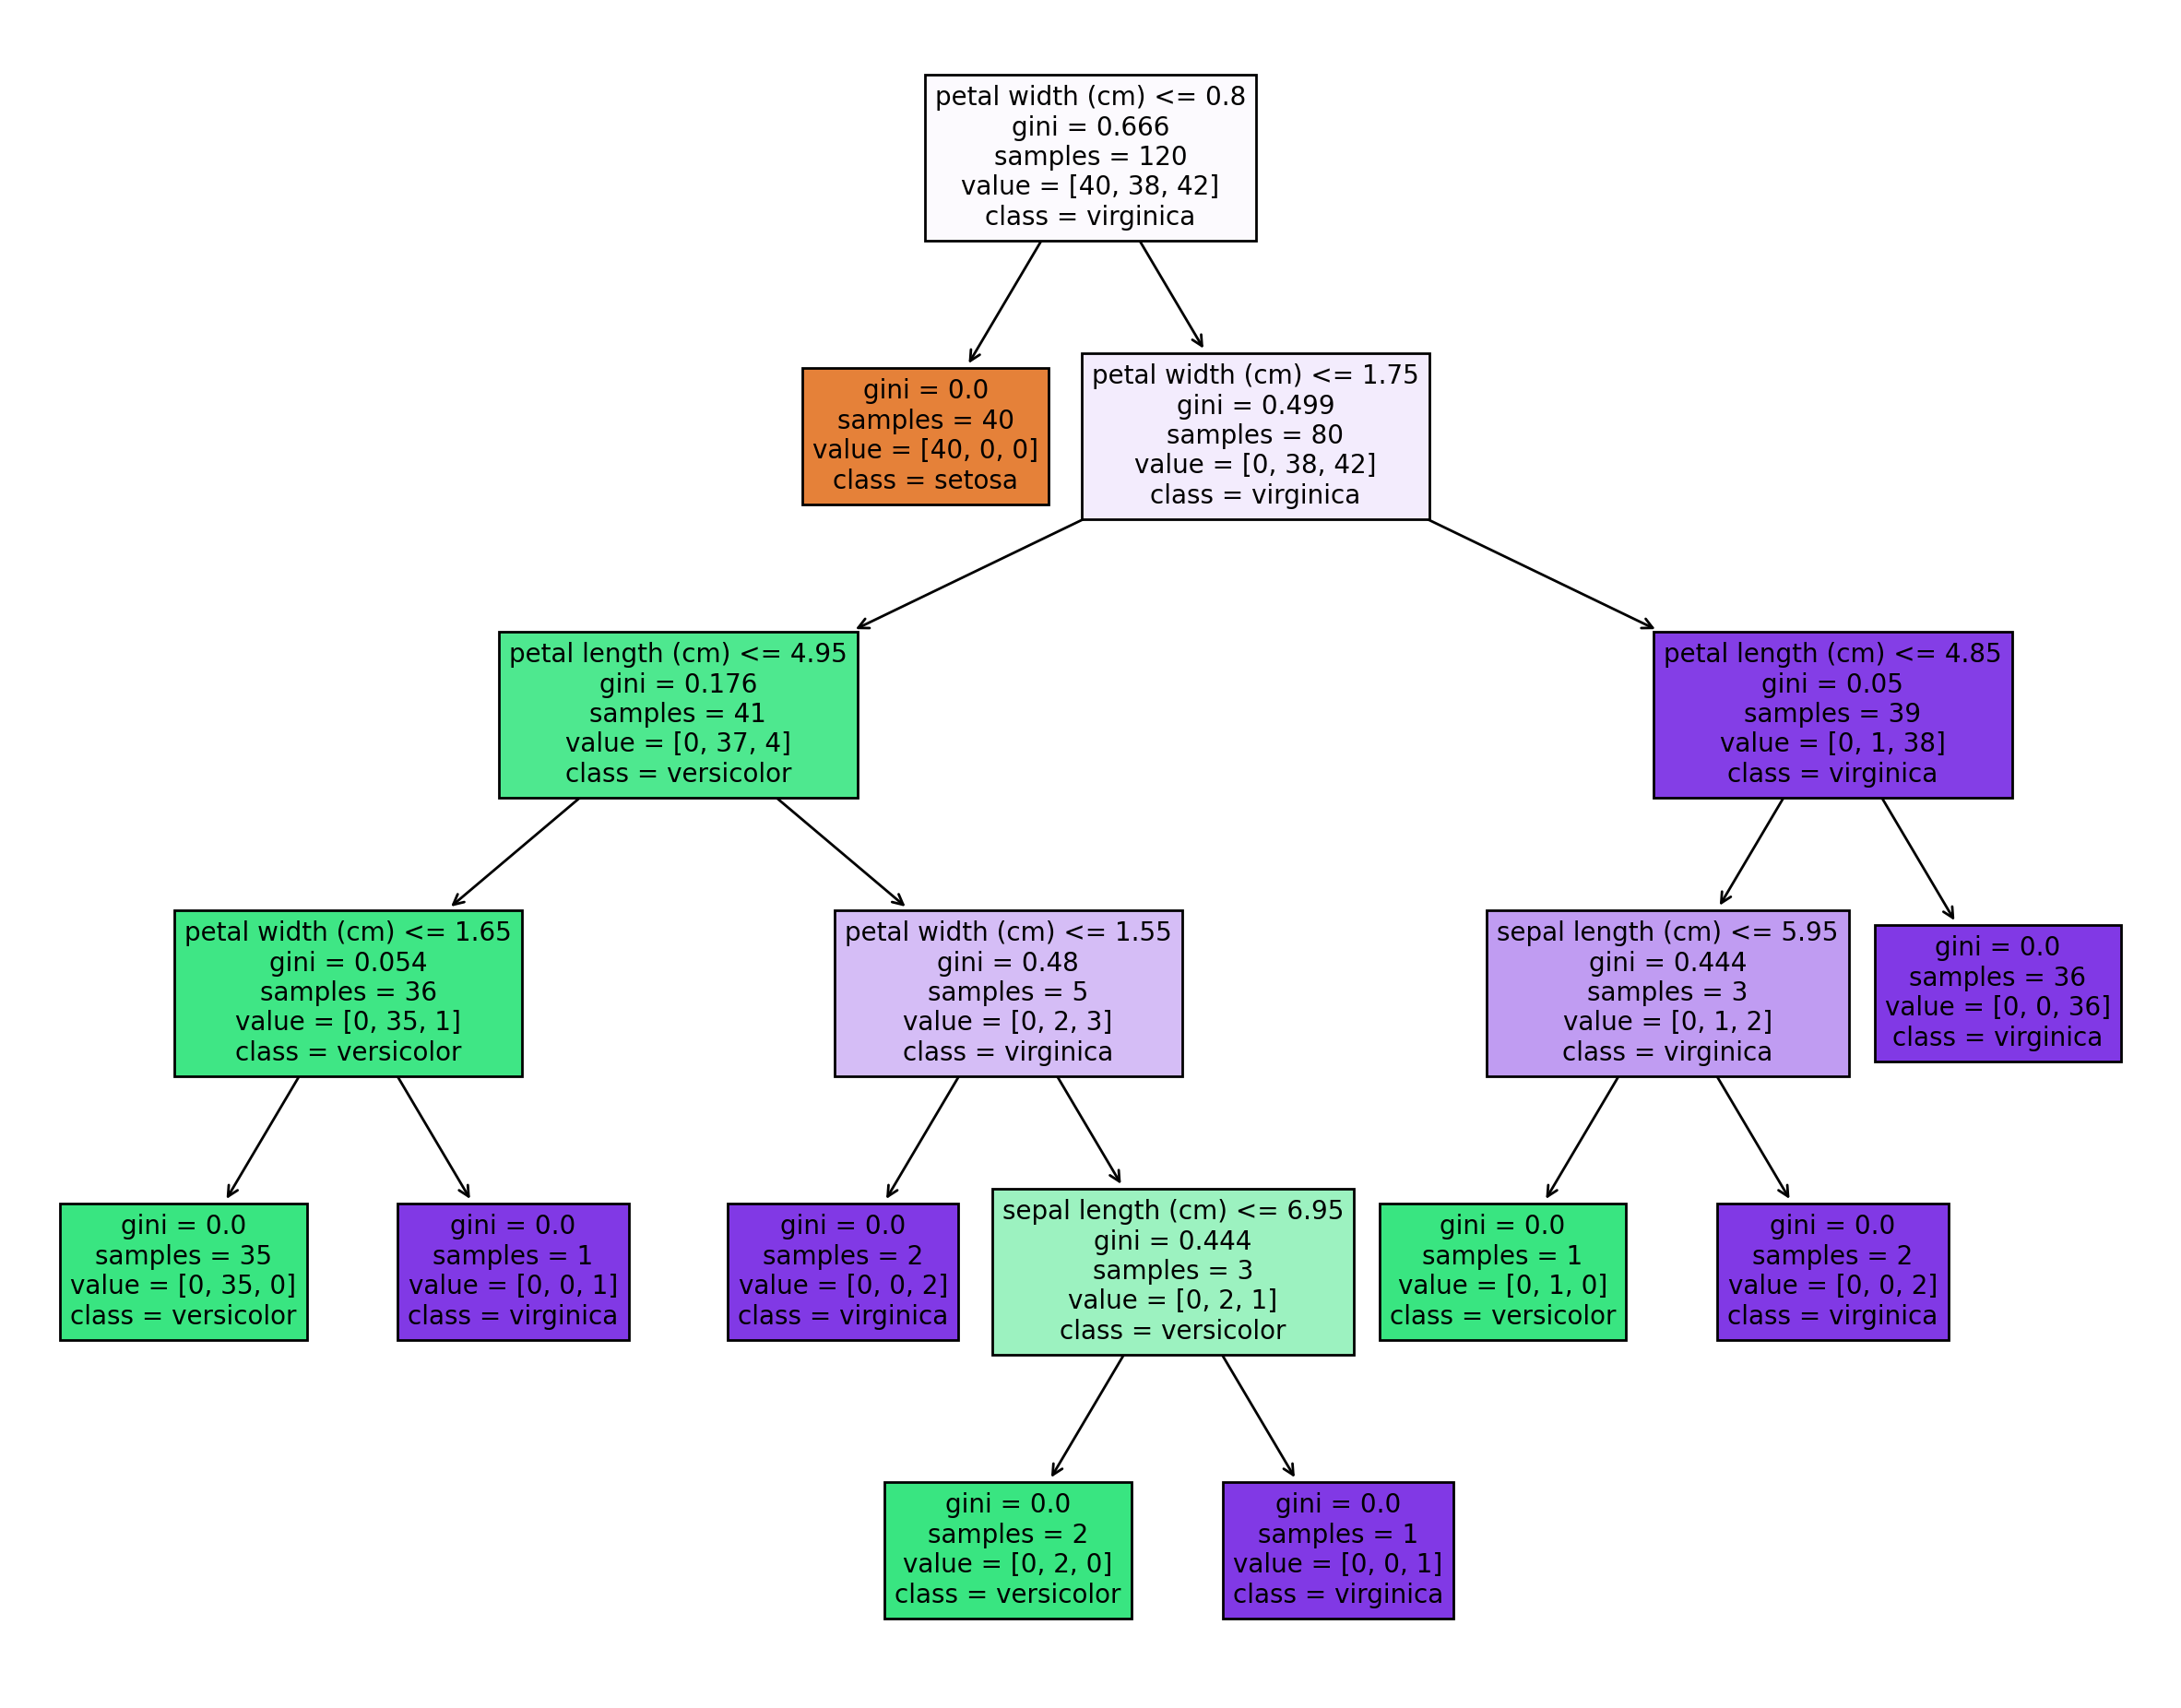

<Figure size 432x288 with 0 Axes>

In [32]:
from sklearn import tree

fn = ['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn = ['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,12), dpi = 200)
tree.plot_tree(decitree, feature_names = fn,class_names = cn, fontsize = 10, filled = True);
plt.show()
plt.tight_layout()


# **The end!!**